#**1)Sentiment Analysis- Elon Musk**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline



/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [39]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [40]:
afinn= pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [56]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [57]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [58]:
elon=pd.read_csv("Elon_musk.csv",encoding='latin-1')
 # removes empty strings, because they are considered in Python as False

In [59]:
type(elon)

pandas.core.frame.DataFrame

In [60]:
import re
#re.sub(r"[^A-Za-z]","",x)

In [61]:
elon['Text']

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [62]:
def text_clean(x):
  x=x.strip()
  x=re.sub(r"[^A-Za-z ]","",str(x))
  return x

In [63]:
elon['clean_text']=elon['Text'].apply(text_clean)

In [64]:
pd.DataFrame(elon)

,Unnamed: 0,Text,clean_text
0,1,@kunalb11 Im an alien,kunalb Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,@joerogan @Spotify Great interview!,joerogan Spotify Great interview
3,4,@gtera27 Doge is underestimated,gtera Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amazin...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy True it sounds so surreal but the nega...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,PPathole Make sure to read ur terms amp condit...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,TeslaGong PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,PPathole Altho Dumb and Dumber is UFUF


In [96]:
##Part Of Speech Tagging
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = elon['clean_text'][25]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [97]:
one_block


'RationalEtienne Adamklotz Starlink is a staggeringly difficult technical amp economic endeavor However if we don httpstcoZAcskqx'

In [98]:
for token in doc_block[0:20]:
    print(token, token.pos_)

RationalEtienne PROPN
Adamklotz PROPN
Starlink PROPN
is AUX
a DET
staggeringly ADV
difficult ADJ
technical ADJ
amp ADJ
economic ADJ
endeavor NOUN
However ADV
if SCONJ
we PRON
don VERB
httpstcoZAcskqx PROPN


In [99]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

[]


In [100]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,endeavor,1
1,don,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

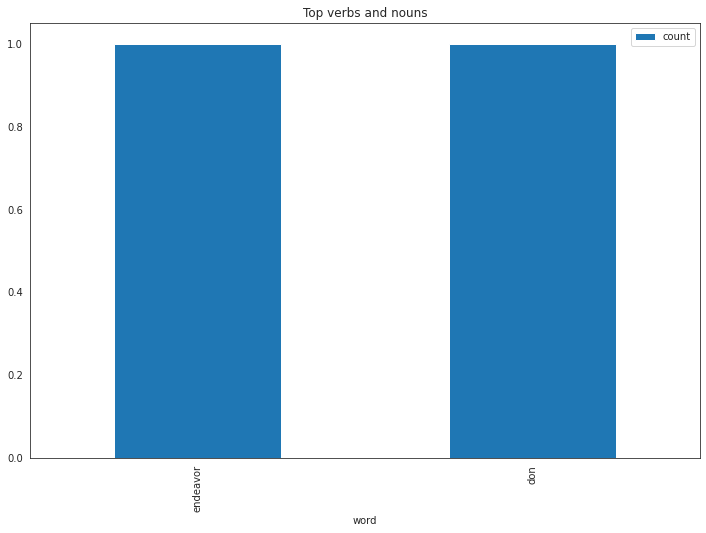

In [101]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [102]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [104]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [106]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(elon['clean_text']))
sentences[0:15]

['kunalb Im an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstcoWFKMYuoj Frodo was the underdogeAll thought he would failHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx Haha thanks  flcnhvy anonyx Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstcorWEuHSTS geoffkeighley UnrealEngine Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy UFUF This is true power haha httpstcoFcuhQSdO freewalletorg Any crypto wallet that wont give

In [107]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,kunalb Im an alien IDAACarmack Ray tracing on ...


In [108]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [109]:
# test that it works
calculate_sentiment(text = 'Unhappy')

Unhappy


0

In [110]:
elon['sentiment_value'] = elon['clean_text'].apply(calculate_sentiment)

kunalb Im an alien
IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it
joerogan Spotify Great interview
gtera Doge is underestimated
teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more
Happy New Year of the Ox httpstcoWFKMYuoj
Frodo was the underdogeAll thought he would failHimself most of all httpstcozGxJFDzzrM
OwenSparks flcnhvy anonyx Haha thanks 
flcnhvy anonyx Indeed Tweets definitely do not represent realworld time allocation
The most entertaining outcome is the most likely
GiveDirectly Just sent some
Just agree to do Clubhouse with kanyewest
httpstcorWEuHSTS
geoffkeighley UnrealEngine Its getting real
Bought some Dogecoin for lil X so he can be a toddler hodler
JoshManMode He definitely has issues but the sentencing seems a bit high
freewalletorg Thanks for fixing
freewalletorg Please unlock my account
AstroJordy UFUF
This is true power haha httpstcoFcuhQSdO
freewalletorg Any crypto wallet that wont give y

In [111]:
elon

,Unnamed: 0,Text,clean_text,sentiment_value,index
0,1,@kunalb11 Im an alien,kunalb Im an alien,0,0
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0,1
2,3,@joerogan @Spotify Great interview!,joerogan Spotify Great interview,3,2
3,4,@gtera27 Doge is underestimated,gtera Doge is underestimated,-1,3
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amazin...,4,4
...,...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy True it sounds so surreal but the nega...,-3,1994
1995,1996,@PPathole Make sure to read ur terms &amp; con...,PPathole Make sure to read ur terms amp condit...,1,1995
1996,1997,@TeslaGong @PPathole Samwise Gamgee,TeslaGong PPathole Samwise Gamgee,0,1996
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,PPathole Altho Dumb and Dumber is UFUF,0,1997


In [112]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    20744
Name: word_count, dtype: int64

In [113]:
elon.sort_values('sentiment_value').tail(10)

,Unnamed: 0,Text,clean_text,sentiment_value,index
1759,1760,@anthm17 What I like most is their great sense...,anthm What I like most is their great sense of...,7,1759
1357,1358,Great trip to Germany. Support from government...,Great trip to Germany Support from government ...,8,1357
1966,1967,@nichegamer I didnt mind DA2. DA1 was awesome...,nichegamer I didnt mind DA DA was awesome Mass...,8,1966
1786,1787,@flcnhvy @yourfavgas @ajtourville I really wan...,flcnhvy yourfavgas ajtourville I really want t...,8,1786
514,515,"@Space_Station @SpaceX Wow, Station looks amaz...",SpaceStation SpaceX Wow Station looks amazing,8,514
468,469,@picot_john @CyberpunkGame Its a good to grea...,picotjohn CyberpunkGame Its a good to great ga...,10,468
458,459,@teslaownerssv It will get absurdly good. Tesl...,teslaownerssv It will get absurdly good Tesla ...,10,458
1172,1173,Thanks Tesla Team for great work on deliveries...,Thanks Tesla Team for great work on deliveries...,10,1172
1304,1305,"One way or another, excitement guaranteed! Sup...",One way or another excitement guaranteed Suppo...,11,1304
1388,1389,"@GerberKawasaki Wow, I super loved astronomy (...",GerberKawasaki Wow I super loved astronomy but...,12,1388


In [114]:
# Sentiment score of the whole review
elon['sentiment_value'].describe()

count    1999.000000
mean        0.611306
std         1.699229
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [115]:
# Sentiment score of the whole review
elon[elon['sentiment_value']<-5].head()

,Unnamed: 0,Text,clean_text,sentiment_value,index
186,187,"@naval [Some tyranny]. Also, the road to hell ...",naval Some tyranny Also the road to hell is mo...,-7,186
1717,1718,@Neuro_Skeptic They dont fire all at once. So...,NeuroSkeptic They dont fire all at once Some g...,-6,1717


In [116]:
elon['index']=range(0,len(elon))

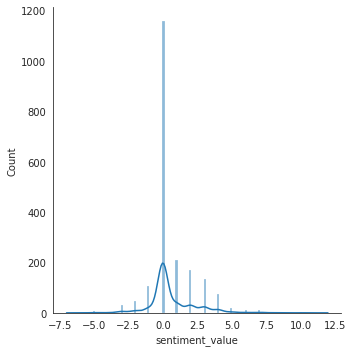

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=elon,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

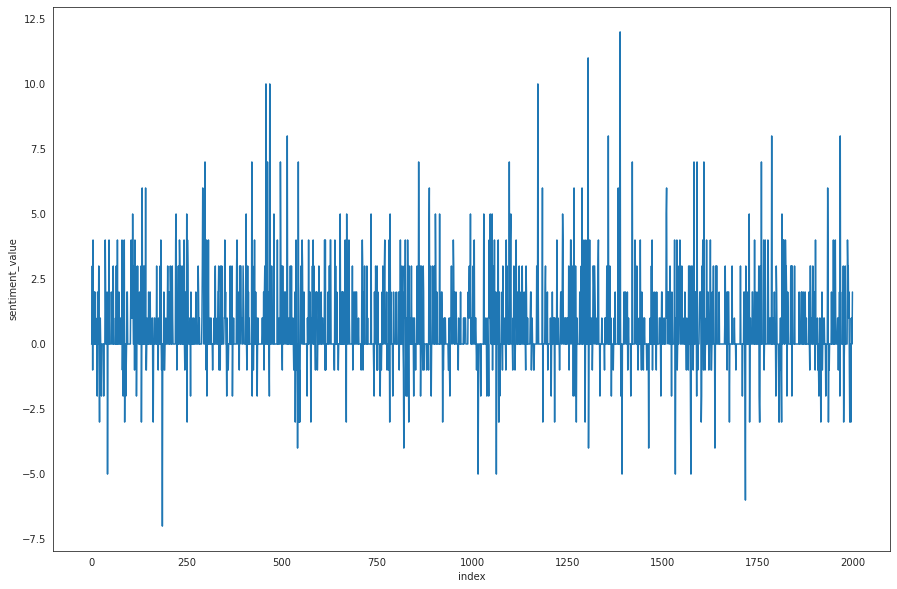

In [118]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=elon)

#**2) Emotion Mining**

In [237]:
pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 7.6 MB/s eta 0:00:00


In [3]:
from google.colab import files
uploaded=files.upload()

Saving extract_reviews.csv to extract_reviews.csv


In [133]:
import pandas as pd
nord=pd.read_csv('extract_reviews.csv')
nord

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I've purchased the...
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is definitely...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I will try to keep...
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Performance up to ...
4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I bought the phone...
...,...,...
1195,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Absolutely the bes...
1196,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I like all the fea...
1197,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It was good expere...
1198,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good product in th...


In [134]:
import re

In [135]:
def text_clean(x):
  x=x.strip()
  x=re.sub(r"[^A-Za-z ]","",str(x))
  return x

In [136]:
nord['clean_text']=nord['comment'].apply(text_clean)

In [137]:
nord

,stars,comment,clean_text
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I've purchased the...,Ive purchased the GB version of this phone whi...
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is definitely...,This is definitely a budget branded phone aft...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I will try to keep...,I will try to keep this review short This revi...
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Performance up to ...,Performance up to the mark If you do more gami...
4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I bought the phone...,I bought the phone in Jan Below are pros an...
...,...,...,...
1195,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Absolutely the bes...,Absolutely the best smartphone with value for ...
1196,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I like all the fea...,I like all the features as it is a budget phon...
1197,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It was good expere...,It was good experence to shoping with amazonmy...
1198,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good product in th...,Good product in this price


In [138]:
#pd.DataFrame(nord)

In [139]:
##Part Of Speech Tagging
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = nord['clean_text'][5]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [142]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['capabilityGood', 'phone', 'category', 'offering', 'are', 'points', 'noticed', 'thing', 'placement', 'power', 'button', 'finger', 'sensor', 'handling', 'phone', 'feels', 'bit', 'fingers', 'lockingunlocking', 'phone']


In [31]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,use,5
1,apps,4
2,review,2
3,camera,2
4,speed,2
5,given,2
6,battery,2
7,time,2
8,screen,2
9,try,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

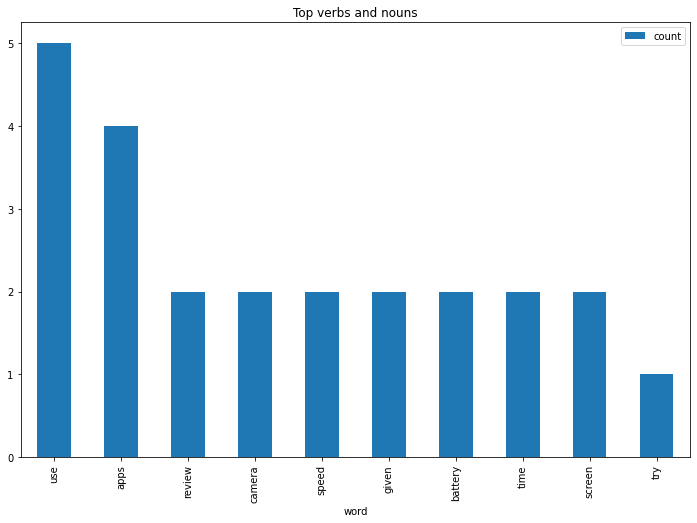

In [32]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(nord['comment']))
sentences[5:15]

['The third point is about the speaker volume.',
 'The speaker is good only at its near maximum levels i.e the volume does not seem to creep up steadily, rather louds out only at its top volume limits.',
 'The fourth point and final one is about the camera shoots where the colors are not very realistic.',
 'Photos taken in day light especially on skin tone tend to be over coloured.',
 'LED flash is average and could have been better.The good and awesome part about this phone is about its practicality for daily users with one-plus strong brand part for the pricing offered.',
 'Battery life is very good and its re-charging capability is also very impressive for someone like me who has just moved from a Android 10 phone.',
 'Build of the phone is apt and will survive normal falls or mishaps from happening.',
 'The Phone does feel solid in hand.',
 'Stock android is clean and nothing to complain about.Overall a clean phone with small improvements that would make it an all-rounder and cut a

In [37]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,\n\n\n\n\n\n\n\n \n \n I've purchased the...
1,First thing is the confusing placement of the ...
2,Daily handling of the mobile phone feels a bit...
3,"Although this is not a big problem, it is stil..."
4,The second point is about lag here and there (...
...,...
8998,"I didn't test by playing the games but, I am s..."
8999,The camera quality is good and smoother.
9000,I am writing this review after using a month.
9001,I like all the features as it is a budget phon...


In [41]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [42]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [43]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [44]:
# test that it works
calculate_sentiment(text = 'Unhappy')

Unhappy


0

In [45]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

Streaming output truncated to the last 5000 lines.
  
  
    It was good experence to shoping with amazon...my phone ie one plus is very nice ...5g experience is very good..Thanks Amazon team..
  
 







  
  
    Good product in this price..
Very Good
  
 







  
  
    I've purchased the 6GB version of this phone which comes with an extendable 2 GB RAM (virtual memory) capability.Good phone, but being the least expensive category offering from One-plus, there are some small evident points that will get noticed.
First thing is the confusing placement of the power button (and hence the finger sensor).
Daily handling of the mobile phone feels a bit annoying with fingers locking/un-locking the phone while you try to handle it and place it into Your pockets.
Although this is not a big problem, it is still something to think about.
The second point is about lag here and there (only to a noticeable bit), which i am hoping might go away with updates/improvements.
The third point is abou

In [46]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    39
1    15
2    27
3    14
4    23
5     8
6    29
7    18
8    14
9    32
Name: word_count, dtype: int64

In [47]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
294,I like all the features as it is a budget phon...,13,82
6825,I like all the features as it is a budget phon...,13,82
2849,I like all the features as it is a budget phon...,13,82
6075,I like all the features as it is a budget phon...,13,82
3553,I like all the features as it is a budget phon...,13,82
3614,I like all the features as it is a budget phon...,13,82
3675,I like all the features as it is a budget phon...,13,82
6150,I like all the features as it is a budget phon...,13,82
6300,I like all the features as it is a budget phon...,13,82
8401,I like all the features as it is a budget phon...,13,82


In [48]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    9003.000000
mean        1.346218
std         2.521841
min        -2.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        13.000000
Name: sentiment_value, dtype: float64

In [49]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,First thing is the confusing placement of the ...,-2,15
2,Daily handling of the mobile phone feels a bit...,-2,27
3,"Although this is not a big problem, it is stil...",-1,14
5,The third point is about the speaker volume.,0,8
7,The fourth point and final one is about the ca...,-1,18


In [51]:
sent_df[sent_df['sentiment_value']<-1].head()['sentence'].tolist()[0]

'First thing is the confusing placement of the power button (and hence the finger sensor).'

In [52]:
sent_df['index']=range(0,len(sent_df))

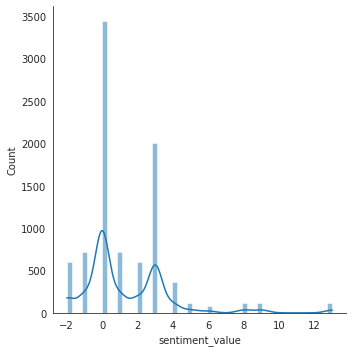

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

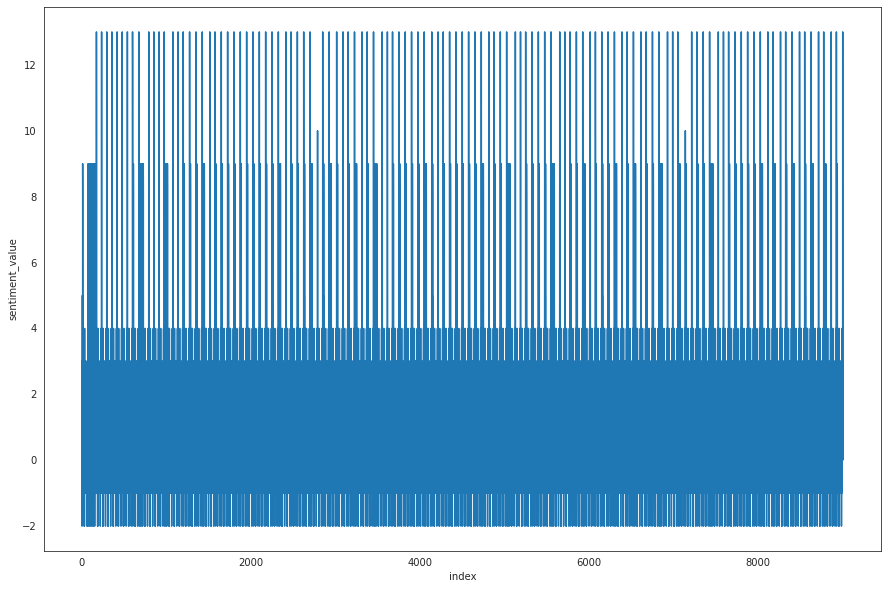

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

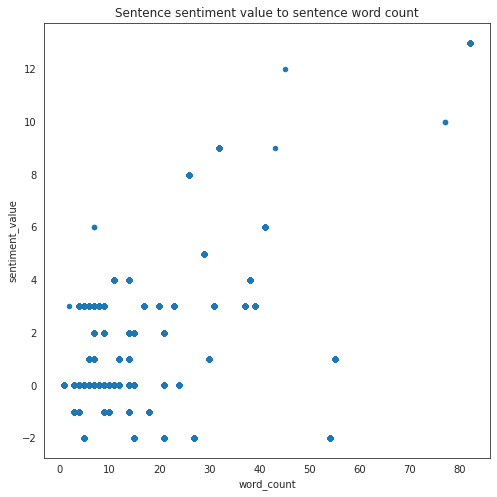

In [55]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')